In [4]:
%load_ext autoreload
%autoreload 2
import utils
import os
import numpy as np
from models import TestModels
import data
import moveFiles


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
moveFiles.moveFiles()

#extract videos into frames and create CSV file
pp = data.Preprocessing()
pp.extractAllVideos()


In [6]:
dataset = data.DataSet()
#save training data to .npz files -- need for generator
dataset.dumpNumpyFiles('train')
dataset.dumpNumpyFiles('test')


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:47<00:00,  2.80s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.37s/it]


In [608]:
# x, y = dataset.all_data('train')
# x[0]

insert


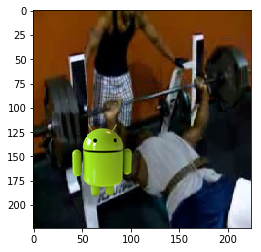

In [601]:
n = 1
utils.displayImage(x[n][11])
print(dataset.reverse_one_hot(y[n]))

In [407]:
# x[n][90]

In [ ]:
tm = TestModels(5, 'lrcn')
gen = data.DataGenerator(batch_size = 1)
val = data.DataGenerator('test', batch_size = 1)
# tm.model.fit(x,y, batch_size=1, epochs=20, shuffle=True)
results = tm.model.fit_generator(gen, validation_data = val, epochs=5)

Epoch 1/5
16/16 [==============================] - ETA: 1:40 - loss: 2.1820 - acc: 0.0000e+0 - ETA: 52s - loss: 2.0560 - acc: 0.0000e+0 - ETA: 35s - loss: 1.9671 - acc: 0.0000e+ - ETA: 26s - loss: 1.8694 - acc: 0.0000e+ - ETA: 21s - loss: 1.8769 - acc: 0.0000e+ - ETA: 17s - loss: 1.8088 - acc: 0.1667   - ETA: 15s - loss: 1.8729 - acc: 0.14 - ETA: 12s - loss: 1.8164 - acc: 0.25 - ETA: 10s - loss: 1.8074 - acc: 0.22 - ETA: 8s - loss: 1.8084 - acc: 0.2000 - ETA: 6s - loss: 1.7913 - acc: 0.181 - ETA: 5s - loss: 1.7861 - acc: 0.166 - ETA: 3s - loss: 1.7663 - acc: 0.153 - ETA: 2s - loss: 1.7700 - acc: 0.142 - ETA: 1s - loss: 1.7385 - acc: 0.200 - 21s 1s/step - loss: 1.7302 - acc: 0.1875 - val_loss: 1.5380 - val_acc: 0.5000
Epoch 2/5
16/16 [==============================] - ETA: 9s - loss: 1.5242 - acc: 1.000 - ETA: 7s - loss: 1.5695 - acc: 0.500 - ETA: 6s - loss: 1.5264 - acc: 0.333 - ETA: 5s - loss: 1.4828 - acc: 0.500 - ETA: 5s - loss: 1.4666 - acc: 0.400 - ETA: 5s - loss: 1.4591 - acc: 0.

In [711]:
n=19
print(tm.model.predict_classes(np.array([x[n]])))
y[n]

[3]


array([0., 0., 0., 1.], dtype=float32)

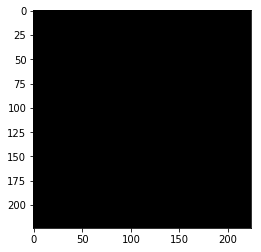

In [694]:
utils.displayImage(x[n][25])

In [664]:
x, y = dataset.all_data_from_npz('train')


In [673]:
# x.shape
x1,y1=np.array([x[n]]),np.array([y[n]])
tm.model.evaluate(x1,y1,batch_size=1)

1/1 [==============================] - 1s 1s/step


[0.744914174079895, 0.0]

In [614]:
dataset.classes

['black', 'compressed', 'insert', 'normal']

In [406]:
dataset.classes

['black', 'compressed', 'normal']

In [415]:
import cv2
import os
image_folder = 'data/test'
video_name = 'test.avi'
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 10, (width, height))
for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))
cv2.destroyAllWindows()
video.release()

In [452]:
from PIL import Image
img = (d[0][0][0]*255).astype('uint8')

In [464]:
im2 = Image.open('test2.png')
# im2 = im.convert('RGBA')
im2.show()

/Users/matt/miniconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


SystemError: new style getargs format but argument is not a tuple

In [490]:

# im2 = Image.open('test2.png')
# im2 = im2.convert('RGB')
area = (30,30)  
# im1.paste(im2, area)

In [570]:
import scipy, imageio
import config
im1 = (d[0][0][0]*255).astype('uint8')
im1 = Image.fromarray(im1)
im1 = im1.convert('RGBA')
im2 = Image.open('test2.png')
im2 = im2.convert(mode='RGBA')
# im2 = scipy.misc.imread('test2.png', mode='RGBA')
# im2 = Image.fromarray(im2)


new_size = np.random.randint(25, int(0.5*config.IMG_WIDTH))
im2 = im2.resize((new_size, new_size), Image.ANTIALIAS)

area = (np.random.randint(config.IMG_WIDTH-new_size), np.random.randint(config.IMG_HEIGHT-new_size))  
im1.paste(im2, area, mask = im2)
im1 = im1.convert('RGB')
im1.show()

In [571]:
x = np.array(im1)

In [572]:
x.shape

(224, 224, 3)

In [9]:
test = [1, 2, 3, 4, 5, 6]

test1 = test[0:2]
test2 = test[4:]

test = test1 + test2

test

[1, 2, 5, 6]

In [35]:
#shutil
#os
import os
import pandas as pd
import glob
import random
from sklearn.model_selection import train_test_split
import shutil

path_to_all = os.path.join('data', 'videos', 'all')

# load files names
filenames = glob.glob(os.path.join(path_to_all, '*.avi'))

classes = ['normal', 'insert', 'dropped', 'compressed', 'black']
fileclasses = [random.choice(classes) for f in filenames]

df = pd.DataFrame({'filenames': filenames, 'classes': fileclasses})

train = df.reset_index().groupby('classes').apply(lambda x: x.sample(frac=0.8)).reset_index(drop=True).set_index('index')                  
test = df.drop(train.index)

trainPath = os.path.join('data', 'videos', 'train')
testPath = os.path.join('data', 'videos', 'test')

# Extract images
if (os.path.isdir(trainPath)):
    shutil.rmtree(trainPath)
os.makedirs(trainPath)

if (os.path.isdir(testPath)):
    shutil.rmtree(testPath)
os.makedirs(testPath)
        
for index, row in train.iterrows():
    f = row.filenames
    videoName = f.split(os.path.sep)[-1]
    c = row.classes
    p = os.path.join(trainPath, c)
    os.makedirs(p, exist_ok = True) #if it exits do nothing
    outPath = os.path.join(p, videoName)
    shutil.copyfile(f, outPath) # copy from all to the correct folder

for index, row in test.iterrows():
    f = row.filenames
    videoName = f.split(os.path.sep)[-1]
    c = row.classes
    p = os.path.join(testPath, c)
    os.makedirs(p, exist_ok = True) #if it exits do nothing
    outPath = os.path.join(p, videoName)
    shutil.copyfile(f, outPath) # copy from all to the correct folder
    


In [30]:
test

,filenames,classes
1,data\videos\all\v_ApplyLipstick_g01_c02.avi,insert
3,data\videos\all\v_ApplyLipstick_g02_c04.avi,black
7,data\videos\all\v_Archery_g02_c04.avi,dropped
18,data\videos\all\v_CricketShot_g02_c06.avi,normal
